In [9]:
import sys
print(sys.version)


3.12.3 (main, Apr  9 2024, 08:09:14) [Clang 15.0.0 (clang-1500.3.9.4)]


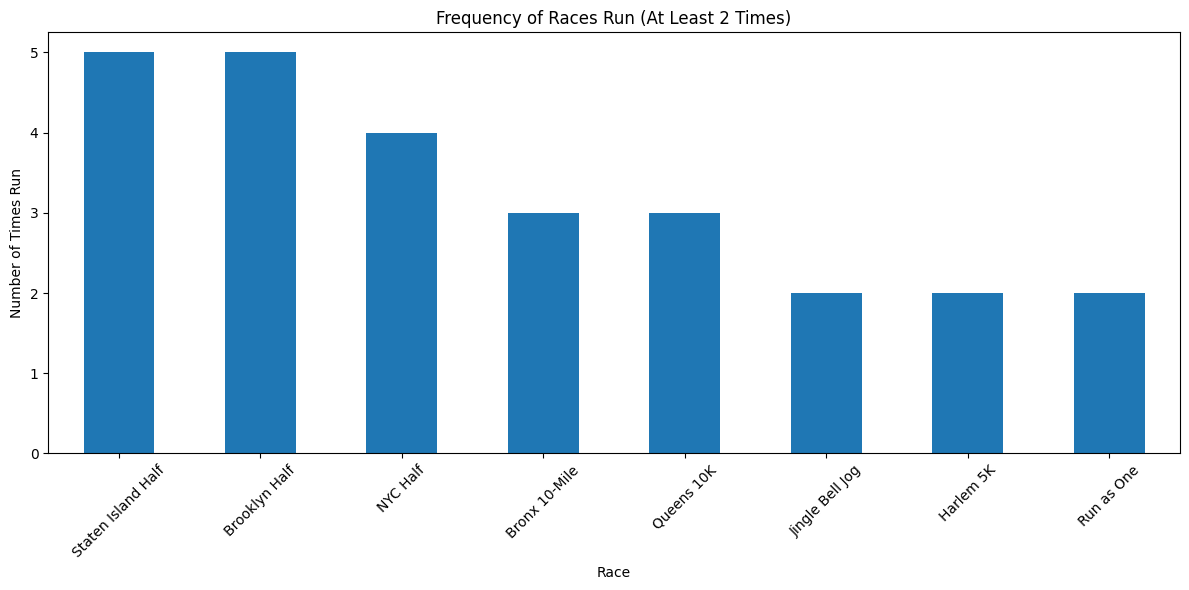

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('../data/nyrr.csv')

# Group by the 'Event Name' column and count the occurrences
race_counts = df['Event Name'].value_counts()

# Filter to only include races run at least 2 times
race_counts = race_counts[race_counts >= 2]

# Plot the data using a bar plot
plt.figure(figsize=(12,6))
race_counts.plot(kind='bar')
plt.title("Frequency of Races Run (At Least 2 Times)")
plt.ylabel("Number of Times Run")
plt.xlabel("Race")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

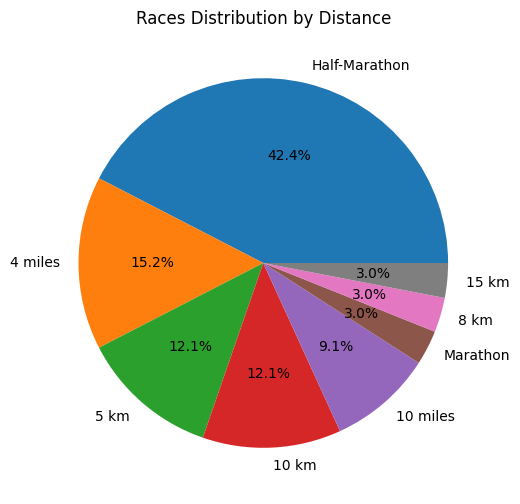

In [11]:
# Read the data
df = pd.read_csv('../data/nyrr.csv')

# Group by 'Distance' and count the occurrences
distance_counts = df['Distance'].value_counts()

# Plot the data using a pie chart
plt.figure(figsize=(6,6))
distance_counts.plot(kind='pie', autopct='%1.1f%%')

# Title for the pie chart
plt.title("Races Distribution by Distance")
plt.ylabel('')  # Hide the y-label

plt.show()

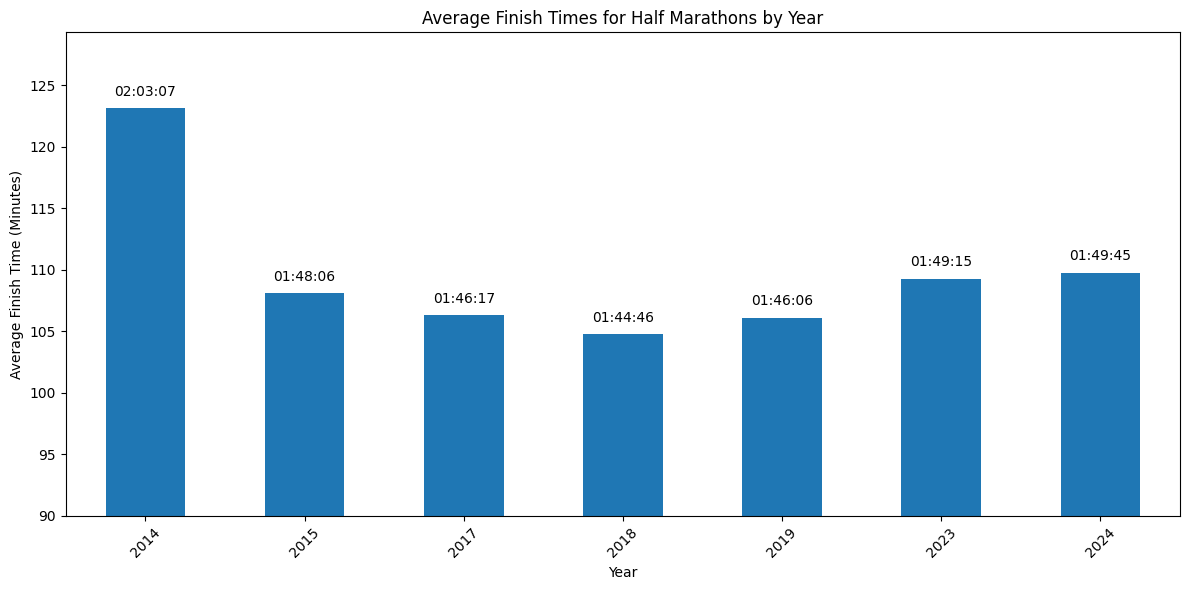

In [16]:
# Function to convert minutes to hh:mm:ss
def minutes_to_hms(minutes):
    hours = int(minutes // 60)
    remaining_minutes = int(minutes % 60)
    seconds = int((minutes - hours * 60 - remaining_minutes) * 60)
    return f'{hours:02d}:{remaining_minutes:02d}:{seconds:02d}'

# Ensure 'Event Date' is a datetime type
df['Event Date'] = pd.to_datetime(df['Event Date'], format='%d-%b-%y')

# Extract year from 'Event Date'
df['Year'] = df['Event Date'].dt.year

# Function to convert 'Finish Time' from hh:mm:ss to total minutes
def time_to_minutes(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 60 + m + s / 60

# Convert 'Finish Time' to minutes
df['Finish Time Minutes'] = df['Finish Time'].apply(time_to_minutes)

df = df[df['Distance'] == 'Half-Marathon']

# Calculate average finish times by year
average_finish_time_by_year = df.groupby('Year')['Finish Time Minutes'].mean()

# Plotting
plt.figure(figsize=(12,6))
bar_plot = average_finish_time_by_year.plot(kind='bar')

# Formatting the plot
plt.title("Average Finish Times for Half Marathons by Year")
plt.ylabel("Average Finish Time (Minutes)")
plt.xlabel("Year")
plt.xticks(rotation=45)

plt.ylim(bottom=90)

# Add the average times above each bar
for index, value in enumerate(average_finish_time_by_year):
    # Convert the average time in minutes to hh:mm:ss and display it
    plt.text(index, value + 1, minutes_to_hms(value), ha='center')

plt.tight_layout()
plt.show()


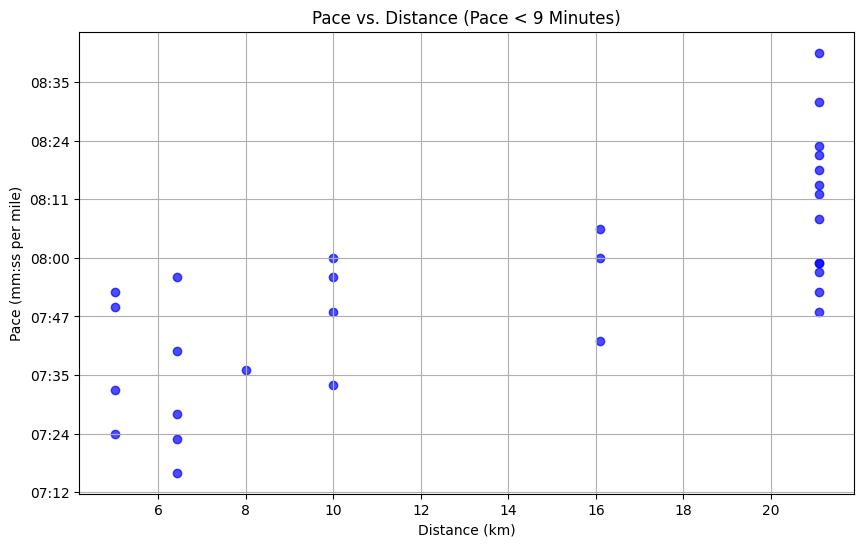

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

df = pd.read_csv('../data/nyrr.csv')

# Convert 'Pace' to a numerical value (in minutes)
df['Pace Minutes'] = df['Pace'].apply(
    lambda x: sum(int(t) * 60 ** i for i, t in enumerate(reversed(x.split(":")))) / 60
)

# Convert 'Distance' to a numerical value, assuming it's a string like '10 km' or 'Half-Marathon'
def distance_to_km(distance):
    if '15 km' in distance:
        return 15.000
    elif '5 km' in distance:
        return 5.000
    elif '8 km' in distance:
        return 8.000
    elif '10 km' in distance:
        return 10.000
    elif '4 miles' in distance:
        return 6.437
    elif '10 miles' in distance:
        return 16.093
    elif 'Half-Marathon' in distance:
        return 21.0975
    elif 'Marathon' in distance:
        return 42.195
    else:
        return None  # Handle other cases or unknown distances

df['Distance km'] = df['Distance'].apply(distance_to_km)

# Filter the DataFrame for pace faster than 10 minutes
df_filtered = df[df['Pace Minutes'] < 9]

def format_pace(x, pos):
    minutes = int(x)
    seconds = int((x - minutes) * 60)
    return f'{minutes:02d}:{seconds:02d}'

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Distance km'], df_filtered['Pace Minutes'], alpha=0.7, color='blue')

# Formatting the y-axis to show 'mm:ss'
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_pace))

plt.title('Pace vs. Distance (Pace < 9 Minutes)')
plt.xlabel('Distance (km)')
plt.ylabel('Pace (mm:ss per mile)')
plt.grid(True)

plt.show()

In [14]:
df = pd.read_csv('../data/nyrr.csv')

half_marathons = df[df['Distance'] == 'Half-Marathon'].copy()

# Convert 'Finish Time' to total seconds for sorting
half_marathons['Total Seconds'] = half_marathons['Finish Time'].apply(
    lambda x: sum(int(t) * 60 ** i for i, t in enumerate(reversed(x.split(":"))))
)

# Sort the half marathons by finish time (Total Seconds)
half_marathons_sorted = half_marathons.sort_values('Total Seconds')

# Select the relevant columns and sort by 'Finish Time'
half_marathons_sorted = half_marathons_sorted[['Event Name', 'Event Date', 'Finish Time']]

# Display the sorted data
half_marathons_sorted.reset_index(drop=True, inplace=True)
print(half_marathons_sorted.to_string(index=False))

        Event Name Event Date Finish Time
     Brooklyn Half  20-May-17     1:42:28
     Brooklyn Half  19-May-18     1:43:19
     Brooklyn Half  18-May-19     1:44:06
          NYC Half  18-Mar-18     1:44:30
          NYC Half  19-Mar-17     1:44:33
Staten Island Half  14-Oct-18     1:46:31
     Brooklyn Half  16-May-15     1:47:32
          NYC Half  17-Mar-19     1:48:07
Staten Island Half  11-Oct-15     1:48:41
Staten Island Half  08-Oct-23     1:49:16
          NYC Half  17-Mar-24     1:49:45
Staten Island Half  08-Oct-17     1:51:50
Staten Island Half  12-Oct-14     1:53:53
     Brooklyn Half  17-May-14     2:12:22


In [15]:
# Read the data
df = pd.read_csv('../data/nyrr.csv')

# Convert 'Pace' to total seconds for sorting
df['Pace Seconds'] = df['Pace'].apply(
    lambda x: sum(int(t) * 60 ** i for i, t in enumerate(reversed(x.split(":"))))
)

# Sort the races by pace (Pace Seconds)
races_sorted_by_pace = df.sort_values('Pace Seconds')

# Select the relevant columns, including 'Distance', and sort by 'Pace'
races_sorted_by_pace = races_sorted_by_pace[['Event Name', 'Event Date', 'Distance', 'Pace']]

# Display the top 20 sorted data without the index
print(races_sorted_by_pace.head(20).to_string(index=False))

           Event Name Event Date      Distance  Pace
           Run as One  22-Apr-18       4 miles 07:16
    Run for the Parks  12-Apr-15       4 miles 07:23
            Harlem 5K  25-Aug-18          5 km 07:24
            Japan Run  13-May-18       4 miles 07:28
Washington Heights 5K  01-Mar-15          5 km 07:33
           Queens 10K  17-Jun-17         10 km 07:34
           France Run  29-Aug-15          8 km 07:37
           Run as One  26-Apr-15       4 miles 07:41
        Bronx 10-Mile  27-Sep-15      10 miles 07:43
           Queens 10K  21-Jun-15         10 km 07:49
        Brooklyn Half  20-May-17 Half-Marathon 07:49
            Harlem 5K  23-Aug-14          5 km 07:50
      Jingle Bell Jog  01-Dec-18          5 km 07:53
        Brooklyn Half  19-May-18 Half-Marathon 07:53
           Queens 10K  16-Jun-18         10 km 07:56
      Jingle Bell Jog  06-Dec-14       4 miles 07:56
        Brooklyn Half  18-May-19 Half-Marathon 07:57
             NYC Half  18-Mar-18 Half-Marathon